In [138]:
# Required Packages
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings("ignore")

# Decision Trees and Random Forests

In this article, we analyze lending data that is publicly available data from [LendingClub.com](https://www.lendingclub.com/info/download-data.action). Borrowers and investors are connected using Lending Club. Learn more about them [here](https://www.lendingclub.com/company/about-us).

As for data analysis, here, we develop a model that will help predict whether a person has a high probability of paying the loan back or not.

### Table of contents
 * [Data](#Data)
 * [Data Analysis](#Data-Analysis)
 * [Modeling](#Modeling)
     * [Train and Test Sets](#Train-and-Test-Sets)
     * [Decision Tree Model](#Decision-Tree-Model)
         * [Decision Tree Model's Predictions and Evaluations](#Decision-Tree-Model's-Predictions-and-Evaluations)
     * [Random Forest Model](#Random-Forest-Model)
         * [Random-Forest-Model's-Predictions-and-Evaluations](#Random-Forest-Model's-Predictions-and-Evaluations)
 * [Conclusions](#Conclusions)

## Data

The data is coming from loan data over a four-year period from 2007 till 2010. The object of the exercise is predicting whether or not the borrower paid back their loan in full. First, let's take a closer look at the data.

In [139]:
Loans = pd.read_csv('Data/loan_data.csv')
Loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [140]:
Loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [141]:
Loans.groupby(['credit.policy']).mean()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,,,,,,,,,,,,
0,0.138680,294.367115,10.88852,13.877901,683.978051,4058.456304,29773.15257,52.934872,3.971092,0.248394,0.091006,0.277837
1,0.118754,325.079200,10.94268,12.298684,717.356031,4682.468461,13798.40428,45.312677,0.997536,0.143191,0.055123,0.131518


## Data Analysis

It is important to visualize the data to identify trends and relationships between its parameters. First, we plot [**FISCO**](http://www.financialdictionary.net/define/FICO/) for the two policies.

Text(0.5,1,'FICO Plot for various loan payments')

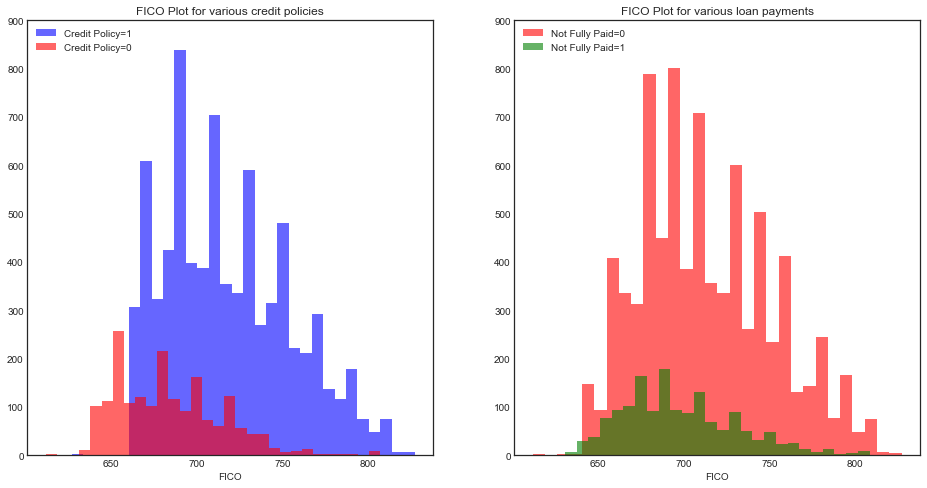

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# Left Plot
ax[0].hist(Loans[Loans['credit.policy']==1]['fico'],bins=30,alpha=0.6,label='Credit Policy=1',color='Blue')
ax[0].hist(Loans[Loans['credit.policy']==0]['fico'],bins=30,alpha=0.6,label='Credit Policy=0',color='Red')
ax[0].legend(loc='upper left')
ax[0].set_xlabel('FICO')
ax[0].set_ylim([0, 900])
plt.xlabel('FICO')
ax[0].set_title('FICO Plot for various credit policies')
# Right Plot
ax[1].hist(Loans[Loans['not.fully.paid']==0]['fico'],bins=30,alpha=0.6,label='Not Fully Paid=0',color='Red')
ax[1].hist(Loans[Loans['not.fully.paid']==1]['fico'],bins=30,alpha=0.6,label='Not Fully Paid=1',color='Green')
ax[1].legend(loc='upper left')
ax[1].set_xlabel('FICO')
ax[1].set_ylim([0, 900])
plt.xlabel('FICO')
ax[1].set_title('FICO Plot for various loan payments')

Visualizing the counts of loan purposes based on whether a borrower fully paid the loan back or not. 

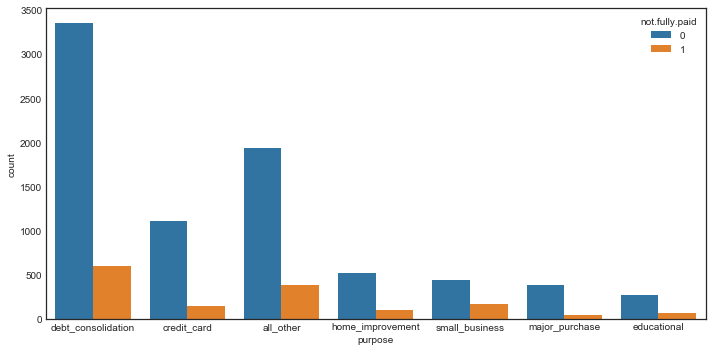

In [143]:
plt.figure(figsize=(10,5))
sns.countplot(Loans['purpose'],hue=Loans['not.fully.paid'])
plt.tight_layout()

Displaying a relationship between **FICO** and **Interest Rate**:

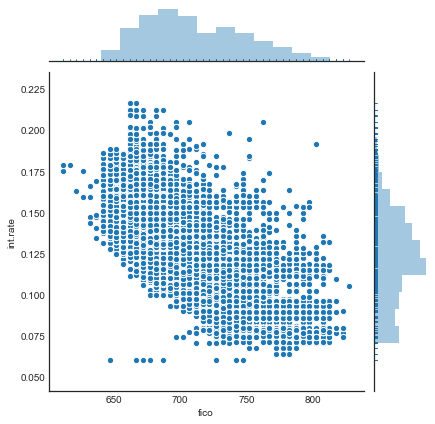

In [144]:
sns.jointplot(x='fico',y='int.rate',data=Loans,
              marginal_kws=dict(bins=15, rug=True),
              annot_kws=dict(stat="r"),
              s=40, edgecolor="w", linewidth=1)

## Modeling

First off, **purpose** column is categorical and we need to introduce dummy variables. This can be done as follows,

In [145]:
Data = pd.get_dummies(Loans,columns=['purpose'], drop_first=True)
Data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Train and Test Sets

Defining *train* and *test* sets:

In [146]:
X = Data.drop('not.fully.paid',axis=1)
y = Data['not.fully.paid']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Decision Tree Model

In [147]:
Decision_Tree= DecisionTreeClassifier()
Decision_Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Decision Tree Model's Predictions and Evaluations

In [148]:
Predict = Decision_Tree.predict(X_test)
print(classification_report(y_test,Predict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2424
           1       0.21      0.23      0.22       450

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.75      2874



It can be seen that the accuracy is about $\%74$.

In [149]:
confusion_matrix(y_test,Predict)

array([[2037,  387],
       [ 347,  103]], dtype=int64)

Off-diagonal elements represent individuals that were misclassified!

### Random Forest Model

In [151]:
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Random Forest Model's Predictions and Evaluations

In [154]:
Predict = Random_Forest.predict(X_test)

In [155]:
print(classification_report(y_test,Predict))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2424
           1       0.34      0.05      0.08       450

    accuracy                           0.84      2874
   macro avg       0.59      0.51      0.50      2874
weighted avg       0.77      0.84      0.78      2874



It can be seen that the accuracy is about $\%84$.

In [44]:
print(confusion_matrix(y_test,predictions))

[[2370   43]
 [ 435   26]]


Off-diagonal elements represent individuals that were misclassified!

## Conclusions

In this article, we visualized and analyzed loan data that is publicly available data from LendingClub.com. We also created two models, the random forest and the decision tree models, that can be used for predictions.  For this data, the random forest performed outperformed the decision tree model in terms of accuracy.